## 1. Setup and Data Loading

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [5]:
# Load the selected buildings data
buildings_df = pd.read_csv('../data/processed/selected_buildings.csv')

print(f"Dataset shape: {buildings_df.shape}")
print(f"\nColumns: {list(buildings_df.columns)}")
print(f"\nFirst few rows:")
buildings_df.head(10)

Dataset shape: (15, 32)

Columns: ['building_id', 'site_id', 'building_id_kaggle', 'site_id_kaggle', 'primaryspaceusage', 'sub_primaryspaceusage', 'sqm', 'sqft', 'lat', 'lng', 'timezone', 'electricity', 'hotwater', 'chilledwater', 'steam', 'water', 'irrigation', 'solar', 'gas', 'industry', 'subindustry', 'heatingtype', 'yearbuilt', 'date_opened', 'numberoffloors', 'occupants', 'energystarscore', 'eui', 'site_eui', 'source_eui', 'leed_level', 'rating']

First few rows:


,building_id,site_id,building_id_kaggle,site_id_kaggle,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,timezone,electricity,hotwater,chilledwater,steam,water,irrigation,solar,gas,industry,subindustry,heatingtype,yearbuilt,date_opened,numberoffloors,occupants,energystarscore,eui,site_eui,source_eui,leed_level,rating
0,Eagle_education_Raul,Eagle,1288.0,14.0,Education,Research,15255.2,164206.0,NaN,NaN,US/Eastern,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lamb_education_Lazaro,Lamb,738.0,5.0,Education,Primary/Secondary Classroom,8866.0,95433.0,51.497838,-3.186246,Europe/London,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Government,Primary/Secondary School,Gas,1966.0,NaN,4.0,1173.0,NaN,NaN,NaN,NaN,NaN,D
2,Rat_education_Adell,Rat,481.0,3.0,Education,K-12 School,9689.2,104294.0,38.903504,-77.005349,US/Eastern,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lamb_office_Maggie,Lamb,686.0,5.0,Office,Office,1134.0,12206.0,51.497838,-3.186246,Europe/London,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Government,"City, County, State",Gas,1976.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lamb_office_Corine,Lamb,NaN,5.0,Office,Office,501.0,5393.0,51.497838,-3.186246,Europe/London,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Government,"City, County, State",Gas,1919.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Hog_office_Shon,Hog,1122.0,13.0,Office,Office,7837.8,84365.0,44.978782,-93.255398,US/Central,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,86.3,122.1,86.8,NaN,NaN
6,Rat_assembly_Silvia,Rat,381.0,3.0,Entertainment/public assembly,Other - Recreation,172.6,1858.0,38.903504,-77.005349,US/Eastern,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Bull_assembly_Beau,Bull,913.0,9.0,Entertainment/public assembly,Conference Center,46789.1,503634.0,30.267200,-97.743100,US/Central,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Bear_assembly_Jose,Bear,640.0,4.0,Entertainment/public assembly,Entertainment/public assembly,3361.2,36180.0,37.871903,-122.260729,US/Pacific,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1966.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Rat_public_Sean,Rat,316.0,3.0,Public services,Other - Public Services,7297.5,78550.0,38.903504,-77.005349,US/Eastern,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Dataset Overview

In [6]:
# Basic information
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"\nNumber of buildings: {len(buildings_df)}")
print(f"\nData types:")
print(buildings_df.dtypes)
print(f"\nMemory usage: {buildings_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

DATASET INFORMATION

Number of buildings: 15

Data types:
building_id               object
site_id                   object
building_id_kaggle       float64
site_id_kaggle           float64
primaryspaceusage         object
sub_primaryspaceusage     object
sqm                      float64
sqft                     float64
lat                      float64
lng                      float64
timezone                  object
electricity               object
hotwater                 float64
chilledwater              object
steam                     object
water                    float64
irrigation               float64
solar                    float64
gas                       object
industry                  object
subindustry               object
heatingtype               object
yearbuilt                float64
date_opened              float64
numberoffloors           float64
occupants                float64
energystarscore          float64
eui                      float64
site_eui          

In [7]:
# Statistical summary for numerical columns
print("=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
buildings_df.describe()

STATISTICAL SUMMARY


,building_id_kaggle,site_id_kaggle,sqm,sqft,lat,lng,hotwater,water,irrigation,solar,yearbuilt,date_opened,numberoffloors,occupants,energystarscore,eui,site_eui,source_eui,leed_level
count,14.000000,15.000000,15.000000,15.000000,14.000000,14.000000,0.0,0.0,0.0,0.0,9.000000,0.0,5.000000,1.0,1.0,1.0,1.0,1.0,0.0
mean,840.571429,7.733333,9898.166667,106543.066667,42.034059,-70.182569,NaN,NaN,NaN,NaN,1968.666667,NaN,4.200000,1173.0,72.0,86.3,122.1,86.8,NaN
std,417.232589,5.119524,11738.697625,126354.312770,6.140735,39.697998,NaN,NaN,NaN,NaN,24.407990,NaN,2.863564,NaN,NaN,NaN,NaN,NaN,NaN
min,316.000000,3.000000,172.600000,1858.000000,30.267200,-122.260729,NaN,NaN,NaN,NaN,1919.000000,NaN,2.000000,1173.0,72.0,86.3,122.1,86.8,NaN
25%,510.000000,3.500000,2247.600000,24193.000000,38.903504,-89.192886,NaN,NaN,NaN,NaN,1966.000000,NaN,2.000000,1173.0,72.0,86.3,122.1,86.8,NaN
50%,712.000000,5.000000,7837.800000,84365.000000,40.681670,-77.005349,NaN,NaN,NaN,NaN,1975.000000,NaN,4.000000,1173.0,72.0,86.3,122.1,86.8,NaN
75%,1246.500000,13.500000,12800.450000,137783.000000,44.349046,-76.485292,NaN,NaN,NaN,NaN,1976.000000,NaN,4.000000,1173.0,72.0,86.3,122.1,86.8,NaN
max,1431.000000,15.000000,46789.100000,503634.000000,51.497838,-3.186246,NaN,NaN,NaN,NaN,2000.000000,NaN,9.000000,1173.0,72.0,86.3,122.1,86.8,NaN


MISSING VALUES ANALYSIS
            Column  Missing_Count  Missing_Percentage
          hotwater             15              100.00
             water             15              100.00
        irrigation             15              100.00
        leed_level             15              100.00
       date_opened             15              100.00
             solar             15              100.00
   energystarscore             14               93.33
        source_eui             14               93.33
          site_eui             14               93.33
            rating             14               93.33
               gas             14               93.33
         occupants             14               93.33
               eui             14               93.33
       heatingtype             12               80.00
      chilledwater             11               73.33
             steam             11               73.33
    numberoffloors             10               66.67
    

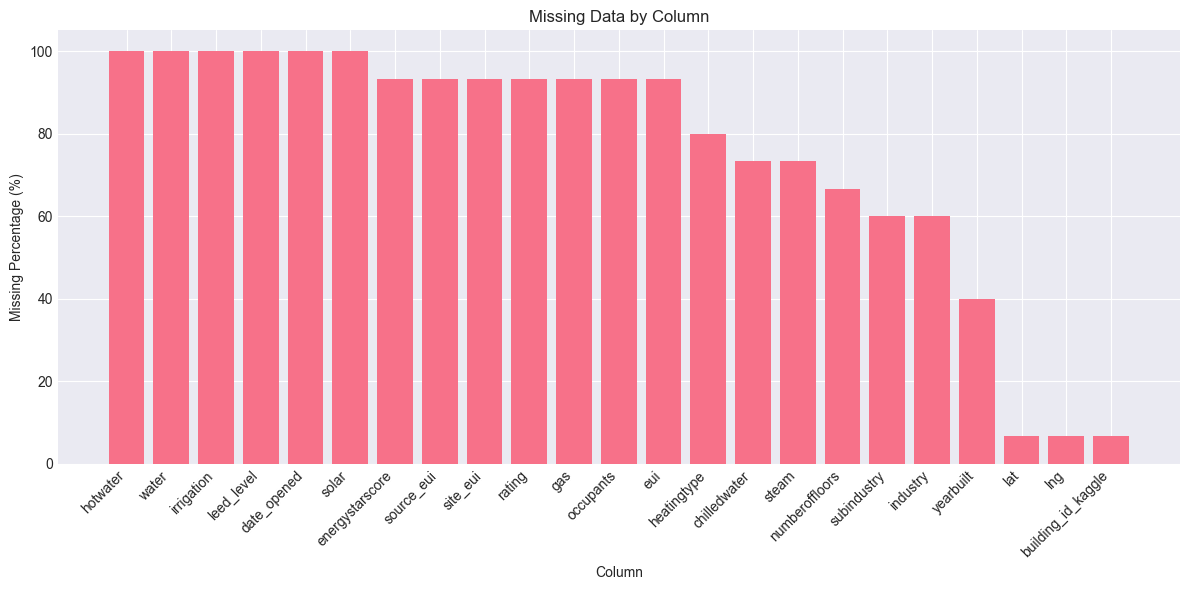

In [8]:
# Missing values analysis
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

missing_data = pd.DataFrame({
    'Column': buildings_df.columns,
    'Missing_Count': buildings_df.isnull().sum(),
    'Missing_Percentage': (buildings_df.isnull().sum() / len(buildings_df) * 100).round(2)
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print(missing_data.to_string(index=False))
    
    # Visualize missing data
    plt.figure(figsize=(12, 6))
    plt.bar(missing_data['Column'], missing_data['Missing_Percentage'])
    plt.xlabel('Column')
    plt.ylabel('Missing Percentage (%)')
    plt.title('Missing Data by Column')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found!")

## 3. Building Characteristics Analysis

In [ ]:
# Analyze building types
if 'primaryspaceusage' in buildings_df.columns:
    print("=" * 60)
    print("BUILDING TYPES DISTRIBUTION")
    print("=" * 60)
    
    building_types = buildings_df['primaryspaceusage'].value_counts()
    print(building_types)
    
    # Visualize
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Bar plot
    building_types.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
    ax1.set_title('Building Types Distribution', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Building Type')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)
    
    # Pie chart
    building_types.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Building Types Proportion', fontsize=14, fontweight='bold')
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Analyze sites
if 'site_id' in buildings_df.columns:
    print("=" * 60)
    print("SITE DISTRIBUTION")
    print("=" * 60)
    
    site_counts = buildings_df['site_id'].value_counts()
    print(site_counts)
    
    # Visualize
    plt.figure(figsize=(12, 6))
    site_counts.plot(kind='bar', color='coral', edgecolor='black')
    plt.title('Buildings per Site', fontsize=14, fontweight='bold')
    plt.xlabel('Site ID')
    plt.ylabel('Number of Buildings')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Analyze building sizes
size_cols = [col for col in ['sqm', 'sqft'] if col in buildings_df.columns]

if size_cols:
    print("=" * 60)
    print("BUILDING SIZE ANALYSIS")
    print("=" * 60)
    
    for col in size_cols:
        data = buildings_df[col].dropna()
        if len(data) > 0:
            print(f"\n{col.upper()}:")
            print(f"  Mean: {data.mean():.2f}")
            print(f"  Median: {data.median():.2f}")
            print(f"  Min: {data.min():.2f}")
            print(f"  Max: {data.max():.2f}")
            print(f"  Std Dev: {data.std():.2f}")
    
    # Visualize distribution
    fig, axes = plt.subplots(1, len(size_cols), figsize=(14, 5))
    if len(size_cols) == 1:
        axes = [axes]
    
    for idx, col in enumerate(size_cols):
        data = buildings_df[col].dropna()
        if len(data) > 0:
            axes[idx].hist(data, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
            axes[idx].set_title(f'{col.upper()} Distribution', fontweight='bold')
            axes[idx].set_xlabel(col.upper())
            axes[idx].set_ylabel('Frequency')
            axes[idx].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.0f}')
            axes[idx].axvline(data.median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {data.median():.0f}')
            axes[idx].legend()
    
    plt.tight_layout()
    plt.show()

## 4. Energy Systems Analysis

In [ ]:
# Analyze available energy systems
energy_systems = ['electricity', 'hotwater', 'chilledwater', 'steam', 'water', 'irrigation', 'solar', 'gas']
available_systems = [col for col in energy_systems if col in buildings_df.columns]

if available_systems:
    print("=" * 60)
    print("ENERGY SYSTEMS AVAILABILITY")
    print("=" * 60)
    
    system_counts = {}
    for system in available_systems:
        # Count 'Yes' values or non-null values
        if buildings_df[system].dtype == 'object':
            count = (buildings_df[system] == 'Yes').sum()
        else:
            count = buildings_df[system].notna().sum()
        system_counts[system] = count
        print(f"{system.capitalize()}: {count} buildings ({count/len(buildings_df)*100:.1f}%)")
    
    # Visualize
    plt.figure(figsize=(12, 6))
    systems = list(system_counts.keys())
    counts = list(system_counts.values())
    
    plt.bar(systems, counts, color='steelblue', edgecolor='black', alpha=0.8)
    plt.title('Energy Systems Availability Across Buildings', fontsize=14, fontweight='bold')
    plt.xlabel('Energy System')
    plt.ylabel('Number of Buildings')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 5. Building Metadata Analysis

In [ ]:
# Analyze year built
if 'yearbuilt' in buildings_df.columns:
    print("=" * 60)
    print("BUILDING AGE ANALYSIS")
    print("=" * 60)
    
    years = buildings_df['yearbuilt'].dropna()
    
    if len(years) > 0:
        current_year = 2026
        ages = current_year - years
        
        print(f"\nYears Built:")
        print(f"  Oldest: {years.min():.0f} ({ages.max():.0f} years old)")
        print(f"  Newest: {years.max():.0f} ({ages.min():.0f} years old)")
        print(f"  Mean: {years.mean():.0f}")
        print(f"  Median: {years.median():.0f}")
        
        # Visualize
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Year built distribution
        ax1.hist(years, bins=20, color='mediumpurple', edgecolor='black', alpha=0.7)
        ax1.set_title('Year Built Distribution', fontweight='bold')
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Frequency')
        ax1.axvline(years.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {years.mean():.0f}')
        ax1.legend()
        
        # Building age distribution
        ax2.hist(ages, bins=20, color='orange', edgecolor='black', alpha=0.7)
        ax2.set_title('Building Age Distribution', fontweight='bold')
        ax2.set_xlabel('Age (years)')
        ax2.set_ylabel('Frequency')
        ax2.axvline(ages.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {ages.mean():.0f} years')
        ax2.legend()
        
        plt.tight_layout()
        plt.show()

In [ ]:
# Analyze number of floors and occupants
numeric_cols = ['numberoffloors', 'occupants', 'energystarscore']
available_numeric = [col for col in numeric_cols if col in buildings_df.columns]

if available_numeric:
    print("=" * 60)
    print("BUILDING CHARACTERISTICS")
    print("=" * 60)
    
    for col in available_numeric:
        data = buildings_df[col].dropna()
        if len(data) > 0:
            print(f"\n{col.replace('_', ' ').title()}:")
            print(f"  Count: {len(data)}")
            print(f"  Mean: {data.mean():.2f}")
            print(f"  Median: {data.median():.2f}")
            print(f"  Min: {data.min():.2f}")
            print(f"  Max: {data.max():.2f}")
    
    # Visualize
    fig, axes = plt.subplots(1, len(available_numeric), figsize=(5*len(available_numeric), 5))
    if len(available_numeric) == 1:
        axes = [axes]
    
    colors = ['teal', 'salmon', 'gold']
    for idx, col in enumerate(available_numeric):
        data = buildings_df[col].dropna()
        if len(data) > 0:
            axes[idx].boxplot(data, vert=True, patch_artist=True,
                            boxprops=dict(facecolor=colors[idx], alpha=0.7),
                            medianprops=dict(color='red', linewidth=2))
            axes[idx].set_title(f"{col.replace('_', ' ').title()}\nDistribution", fontweight='bold')
            axes[idx].set_ylabel('Value')
            axes[idx].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 6. Geographic Distribution

In [ ]:
# Analyze timezone distribution
if 'timezone' in buildings_df.columns:
    print("=" * 60)
    print("TIMEZONE DISTRIBUTION")
    print("=" * 60)
    
    timezone_counts = buildings_df['timezone'].value_counts()
    print(timezone_counts)
    
    # Visualize
    plt.figure(figsize=(12, 6))
    timezone_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title('Buildings by Timezone', fontsize=14, fontweight='bold')
    plt.xlabel('Timezone')
    plt.ylabel('Number of Buildings')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
# Geographic scatter plot if lat/lng available
if 'lat' in buildings_df.columns and 'lng' in buildings_df.columns:
    print("=" * 60)
    print("GEOGRAPHIC DISTRIBUTION")
    print("=" * 60)
    
    geo_data = buildings_df[['lat', 'lng', 'building_id']].dropna()
    
    if len(geo_data) > 0:
        print(f"\nBuildings with location data: {len(geo_data)}")
        
        # Create scatter plot
        plt.figure(figsize=(14, 8))
        
        # Color by site if available
        if 'site_id' in buildings_df.columns:
            for site in buildings_df['site_id'].dropna().unique():
                site_data = buildings_df[buildings_df['site_id'] == site]
                site_geo = site_data[['lat', 'lng']].dropna()
                if len(site_geo) > 0:
                    plt.scatter(site_geo['lng'], site_geo['lat'], 
                              s=200, alpha=0.6, label=f'Site: {site}', 
                              edgecolors='black', linewidth=1.5)
        else:
            plt.scatter(geo_data['lng'], geo_data['lat'], 
                      s=200, alpha=0.6, c='blue',
                      edgecolors='black', linewidth=1.5)
        
        plt.xlabel('Longitude', fontsize=12)
        plt.ylabel('Latitude', fontsize=12)
        plt.title('Geographic Distribution of Buildings', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        print("No geographic data available")

## 7. Cross-Analysis: Building Type vs Characteristics

In [ ]:
# Analyze building size by type
if 'primaryspaceusage' in buildings_df.columns and 'sqm' in buildings_df.columns:
    print("=" * 60)
    print("BUILDING SIZE BY TYPE")
    print("=" * 60)
    
    size_by_type = buildings_df.groupby('primaryspaceusage')['sqm'].agg(['count', 'mean', 'median', 'std']).round(2)
    print(size_by_type)
    
    # Visualize
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Mean size by type
    size_by_type['mean'].plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
    ax1.set_title('Average Building Size by Type', fontweight='bold')
    ax1.set_xlabel('Building Type')
    ax1.set_ylabel('Mean Size (sqm)')
    ax1.tick_params(axis='x', rotation=45)
    
    # Box plot
    buildings_df.boxplot(column='sqm', by='primaryspaceusage', ax=ax2, 
                        patch_artist=True, rot=45)
    ax2.set_title('Size Distribution by Building Type', fontweight='bold')
    ax2.set_xlabel('Building Type')
    ax2.set_ylabel('Size (sqm)')
    plt.suptitle('')  # Remove default title
    
    plt.tight_layout()
    plt.show()

## 8. Correlation Analysis

In [ ]:
# Select numeric columns for correlation analysis
numeric_cols = buildings_df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 1:
    print("=" * 60)
    print("CORRELATION ANALYSIS")
    print("=" * 60)
    
    correlation_matrix = buildings_df[numeric_cols].corr()
    
    # Visualize correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Find strong correlations (> 0.7 or < -0.7)
    print("\nStrong Correlations (|r| > 0.7):")
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                strong_corr.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    correlation_matrix.iloc[i, j]
                ))
    
    if strong_corr:
        for var1, var2, corr in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
            print(f"  {var1} <-> {var2}: {corr:.3f}")
    else:
        print("  No strong correlations found")

## 9. Temporal Patterns in Energy Consumption

In [ ]:
# Display comprehensive building information
print("=" * 60)
print("SELECTED BUILDINGS SUMMARY")
print("=" * 60)

# Key columns to display
display_cols = ['building_id', 'site_id', 'primaryspaceusage', 'sqm', 'yearbuilt', 
                'numberoffloors', 'occupants', 'electricity']
available_display = [col for col in display_cols if col in buildings_df.columns]

buildings_df[available_display]

## 10. Data Quality Assessment

In [ ]:
print("=" * 60)
print("DATA QUALITY ASSESSMENT")
print("=" * 60)

print(f"\n✅ Total buildings: {len(buildings_df)}")
print(f"✅ Total features: {len(buildings_df.columns)}")
print(f"\n📊 Completeness:")

# Calculate completeness for each column
completeness = ((1 - buildings_df.isnull().sum() / len(buildings_df)) * 100).round(2)
completeness_df = pd.DataFrame({
    'Feature': completeness.index,
    'Completeness (%)': completeness.values
}).sort_values('Completeness (%)', ascending=False)

print(completeness_df.to_string(index=False))

# Overall data quality score
avg_completeness = completeness.mean()
print(f"\n📈 Average Completeness: {avg_completeness:.2f}%")

if avg_completeness >= 90:
    print("✅ Data Quality: EXCELLENT")
elif avg_completeness >= 75:
    print("✅ Data Quality: GOOD")
elif avg_completeness >= 60:
    print("⚠️ Data Quality: FAIR - Some features may need attention")
else:
    print("❌ Data Quality: POOR - Significant data cleaning recommended")

## 11. Transfer Learning Suitability Analysis

In [ ]:
print("=" * 60)
print("TRANSFER LEARNING SUITABILITY")
print("=" * 60)

# Analyze building similarity for transfer learning
if 'primaryspaceusage' in buildings_df.columns:
    building_types = buildings_df['primaryspaceusage'].value_counts()
    
    print("\n📋 Building Type Distribution:")
    for building_type, count in building_types.items():
        print(f"  {building_type}: {count} building(s)")
    
    print("\n💡 Transfer Learning Recommendations:")
    
    # Same type transfer
    same_type_groups = building_types[building_types > 1]
    if len(same_type_groups) > 0:
        print("\n  ✅ Same-Type Transfer Learning:")
        for building_type, count in same_type_groups.items():
            print(f"     - {building_type}: {count} buildings (Good candidate for within-type transfer)")
    
    # Cross-type transfer
    if len(building_types) > 1:
        print("\n  🔄 Cross-Type Transfer Learning:")
        print(f"     - {len(building_types)} different building types available")
        print(f"     - Consider transferring from {building_types.index[0]} (most common) to others")

# Site-based analysis
if 'site_id' in buildings_df.columns:
    site_counts = buildings_df['site_id'].value_counts()
    
    print("\n  🌍 Same-Site Transfer Learning:")
    same_site_groups = site_counts[site_counts > 1]
    if len(same_site_groups) > 0:
        for site, count in same_site_groups.items():
            print(f"     - Site {site}: {count} buildings (Share climate/weather patterns)")

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE")
print("=" * 60)

## 12. Export Summary Report

In [ ]:
# Create a summary report
summary_report = {
    'Total Buildings': len(buildings_df),
    'Total Features': len(buildings_df.columns),
    'Average Completeness': f"{completeness.mean():.2f}%",
    'Missing Values': buildings_df.isnull().sum().sum(),
}

if 'primaryspaceusage' in buildings_df.columns:
    summary_report['Building Types'] = buildings_df['primaryspaceusage'].nunique()
    summary_report['Most Common Type'] = buildings_df['primaryspaceusage'].mode()[0] if len(buildings_df['primaryspaceusage'].mode()) > 0 else 'N/A'

if 'site_id' in buildings_df.columns:
    summary_report['Number of Sites'] = buildings_df['site_id'].nunique()

print("\n📊 DATASET SUMMARY REPORT")
print("=" * 60)
for key, value in summary_report.items():
    print(f"{key}: {value}")

# Save report to file
report_df = pd.DataFrame([summary_report])
report_path = '../results/eda_summary_report.csv'
report_df.to_csv(report_path, index=False)
print(f"\n✅ Summary report saved to: {report_path}")